# Part 2
## Question 1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

In [25]:
def sim_BS(T, r, S0, sigma_stock, M, seed=None):
    # Function to simulate a stock price using the Black-Scholes model

    rs = RandomState(MT19937(SeedSequence(seed)))

    dt = T / M
    S = np.zeros(M + 1)
    S[0] = S0
    for i in range(1, M + 1):
        Z = rs.standard_normal()
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma_stock ** 2) * dt + sigma_stock * np.sqrt(dt) * Z)
    return S

Option value:  9.330364742630877


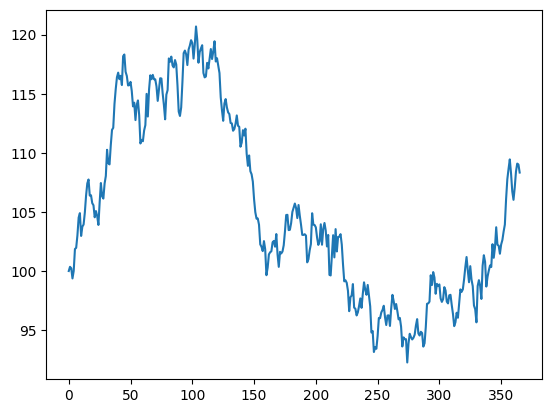

In [26]:
# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

S = sim_BS(T, r, S0, sigma_stock, M, None)
plt.plot(S)
print("Option value: ", np.maximum(S[-1] - K, 0))

Simulating deltas with the same seed: 100%|██████████| 1000/1000 [00:01<00:00, 608.88it/s]


Mean delta and standard deviation with different seeds: -30.15451863360332, 2291.7393090560777
Mean delta and standard deviation with the same seed: 0.717931973783054, 0.5999264369428775


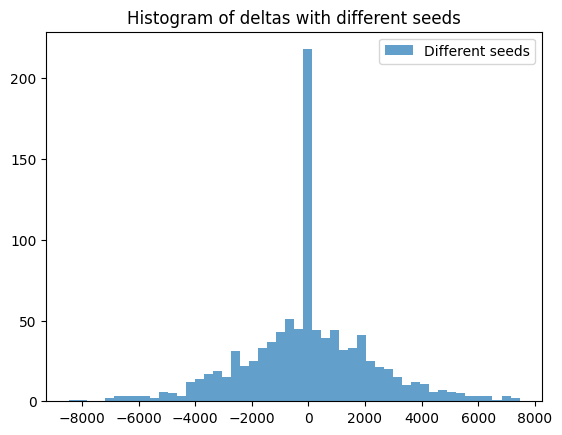

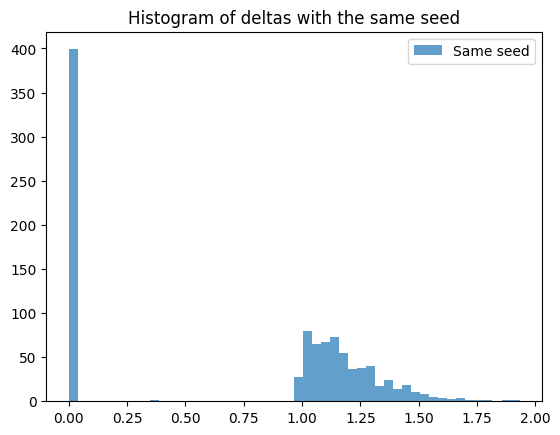

In [27]:
# Monte Carlo Simulation bump and revalue

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)


N = 1000           # Number of repetitions
bump = 0.01         # The size of the bump

delta_diff = np.zeros(N) # Array for results with different seeds
delta_same = np.zeros(N) # Array for results with the same seed

# Different seeds (setting None gives different seeds every time):
for i in tqdm(range(N), desc='Simulating deltas with different seeds'):
    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=None)
    unbumped_payoff = np.maximum(unbumped_S[-1] - K, 0)

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)
    bumped_payoff = np.maximum(bumped_S[-1] - K, 0)

    delta_diff[i] = (bumped_payoff - unbumped_payoff) / bump

# Same seeds (setting a specific seed gives the same seed every time):
for i in tqdm(range(N), desc='Simulating deltas with the same seed'):
    seed = np.random.randint(0, 1000000)

    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=seed)
    unbumped_payoff = np.maximum(unbumped_S[-1] - K, 0)

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=seed)
    bumped_payoff = np.maximum(bumped_S[-1] - K, 0)

    # print(f"Bumped payoff: {bumped_payoff}, Unbumped payoff: {unbumped_payoff}, Delta: {(bumped_payoff - unbumped_payoff) / bump}")
    delta_same[i] = (bumped_payoff - unbumped_payoff) / bump

    # if 0 < delta_same[i] < 1:
    #     print(f"Seed {i} gives a delta of {delta_same[i]}")

print(f"Mean delta and standard deviation with different seeds: {np.mean(delta_diff)}, {np.std(delta_diff)}")
print(f"Mean delta and standard deviation with the same seed: {np.mean(delta_same)}, {np.std(delta_same)}")

# Plotting the results in different histograms
plt.figure()
plt.hist(delta_diff, bins=50, alpha=0.7, label='Different seeds')
plt.legend()
plt.title('Histogram of deltas with different seeds')
plt.show()

plt.figure()
plt.hist(delta_same, bins=50, alpha=0.7, label='Same seed')
plt.legend()
plt.title('Histogram of deltas with the same seed')
plt.show()


## Question 2

Simulating deltas with the same seed: 100%|██████████| 10000/10000 [00:16<00:00, 606.02it/s]


Mean delta and standard deviation with different seeds: 0.09229292429125638, 6.5714920135576005
Mean delta and standard deviation with the same seed: 0.018835290671684976, 0.42074852247957406


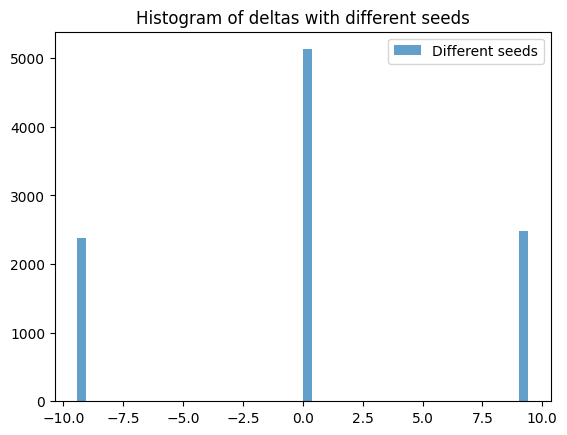

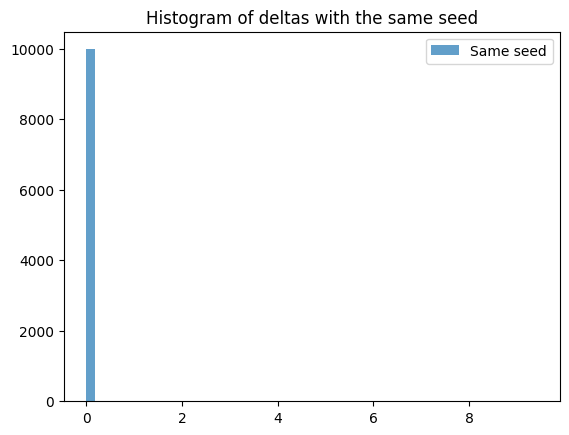

In [126]:
# Monte Carlo Simulation bump and revalue digital option

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)


N = 10000            # Number of repetitions
bump = 0.1            # The size of the bump

delta_diff = np.zeros(N) # Array for results with different seeds
delta_same = np.zeros(N) # Array for results with the same seed

# Different seeds (setting None gives different seeds every time):
for i in tqdm(range(N), desc='Simulating deltas with different seeds'):
    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=None)
    unbumped_payoff = 1 if unbumped_S[-1] > K else 0 # NEW PAYOFF LINE

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)
    bumped_payoff = 1 if bumped_S[-1] > K else 0

    delta_diff[i] = np.exp(-r * T) * (bumped_payoff - unbumped_payoff) / bump

# Same seeds (setting a specific seed gives the same seed every time):
for i in tqdm(range(N), desc='Simulating deltas with the same seed'):
    seed = np.random.randint(0, 1000000)

    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=seed)
    unbumped_payoff = 1 if unbumped_S[-1] > K else 0

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=seed)
    bumped_payoff = 1 if bumped_S[-1] > K else 0

    # print(f"Bumped payoff: {bumped_payoff}, Unbumped payoff: {unbumped_payoff}, Delta: {(bumped_payoff - unbumped_payoff) / bump}")
    delta_same[i] = np.exp(-r * T) * (bumped_payoff - unbumped_payoff) / bump

print(f"Mean delta and standard deviation with different seeds: {np.mean(delta_diff)}, {np.std(delta_diff)}")
print(f"Mean delta and standard deviation with the same seed: {np.mean(delta_same)}, {np.std(delta_same)}")

# Plotting the results in different histograms
plt.figure()
plt.hist(delta_diff, bins=50, alpha=0.7, label='Different seeds')
plt.legend()
plt.title('Histogram of deltas with different seeds')
plt.show()

plt.figure()
plt.hist(delta_same, bins=50, alpha=0.7, label='Same seed')
plt.legend()
plt.title('Histogram of deltas with the same seed')
plt.show()

In this situation, a bigger bump could improve the results. Since the numerator for the estimate is $\in \{-1, 0, 1\}$, a small bump blows up this estimate.

In [29]:
def smooth_digital_payoff(S, K, epsilon):
    return 1 / (1 + np.exp(- (S - K) / epsilon))

Simulating deltas with pathwise method:   0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_18832\2540741290.py:29: RuntimeWarning: overflow encountered in scalar power
  delta[i] = np.exp(-r * T) * ST_term / (epsilon * (ST_term + 1)**2) * S[-1] / S0
Simulating deltas with pathwise method:   7%|▋         | 729/10000 [00:00<00:07, 1202.47it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_18832\2540741290.py:20: RuntimeWarning: overflow encountered in exp
  ST_term = np.exp((S[-1] - K) / epsilon)
Simulating deltas with pathwise method:  11%|█         | 1095/10000 [00:00<00:07, 1207.92it/s]

ST_term is inf with S[-1] = 210.35943989861988 and K = 99 and epsilon = 0.15


Simulating deltas with pathwise method:  27%|██▋       | 2668/10000 [00:02<00:06, 1197.15it/s]

ST_term is inf with S[-1] = 223.32598057515096 and K = 99 and epsilon = 0.15


Simulating deltas with pathwise method:  35%|███▌      | 3511/10000 [00:02<00:05, 1194.77it/s]

ST_term is inf with S[-1] = 211.26441029677028 and K = 99 and epsilon = 0.15


Simulating deltas with pathwise method:  88%|████████▊ | 8843/10000 [00:07<00:00, 1192.85it/s]

ST_term is inf with S[-1] = 208.98973665874985 and K = 99 and epsilon = 0.15


Simulating deltas with pathwise method: 100%|██████████| 10000/10000 [00:08<00:00, 1197.66it/s]


Mean delta and standard deviation with pathwise method: 0.018308003431020348, 0.13643830862965808


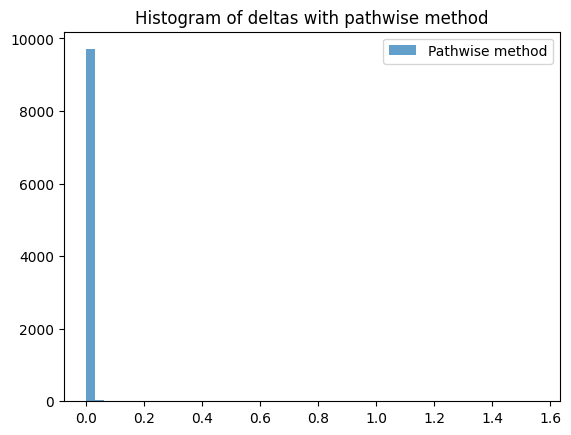

In [127]:
# Pathwise method

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

epsilon = 0.15      # Smoothing function parameter

N = 10000            # Number of repetitions

delta = np.zeros(N)  # Array for results

for i in tqdm(range(N), desc='Simulating deltas with pathwise method'):
    S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)

    ST_term = np.exp((S[-1] - K) / epsilon)

    # Check if ST_term is too large or too small
    if abs(ST_term) > 1e308 or abs(ST_term) < 1e-308:
        print(f"ST_term is {ST_term} with S[-1] = {S[-1]} and K = {K} and epsilon = {epsilon}")
        continue
    

    # print(ST_term)
    delta[i] = np.exp(-r * T) * ST_term / (epsilon * (ST_term + 1)**2) * S[-1] / S0

print(f"Mean delta and standard deviation with pathwise method: {np.mean(delta)}, {np.std(delta)}")

# Plotting the results in a histogram
plt.figure()
plt.hist(delta, bins=50, alpha=0.7, label='Pathwise method')
plt.legend()
plt.title('Histogram of deltas with pathwise method')
plt.show()

Simulating deltas with likelihood ratio method: 100%|██████████| 10000/10000 [00:08<00:00, 1205.46it/s]


Mean delta and standard deviation with likelihood ratio method: 0.018316526630517443, 0.02828392765942342


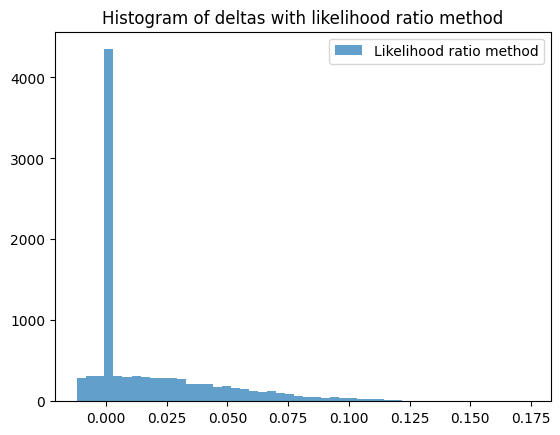

In [130]:
# likelihood ratio method

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

N = 10000            # Number of repetitions

delta = np.zeros(N)  # Array for results

for i in tqdm(range(N), desc='Simulating deltas with likelihood ratio method'):
    S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)

    Y = (np.log(S[-1] / S0) - (r - 0.5 * sigma_stock**2) * T) / (S0 * sigma_stock ** 2 * T)

    delta[i] = np.exp(-r * T) * (1 if S[-1] > K else 0) * Y

print(f"Mean delta and standard deviation with likelihood ratio method: {np.mean(delta)}, {np.std(delta)}")

# Plotting the results in a histogram
plt.figure()
plt.hist(delta, bins=50, alpha=0.7, label='Likelihood ratio method')
plt.legend()
plt.title('Histogram of deltas with likelihood ratio method')
plt.show()